In [40]:
#Unit 6 - Pythonic Monopoly

In [153]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from panel.interact import interact
from pathlib import Path
from dotenv import load_dotenv

In [42]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_KEY")
print(map_box_api)

pk.eyJ1IjoiZmVybjExMjMiLCJhIjoiY2wxYmNhZDl0MmVvcjNldjAzcTBqNDNnMyJ9.R37GH0MmgML-edU_T4sDaQ


In [43]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Py Viz/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [44]:
to_data

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


In [45]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)

In [46]:
dwelling_types_per_year = to_data.groupby('year').sum()
dwelling_types_per_year = dwelling_types_per_year[['single_detached_house' , 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]

In [47]:
dwelling_types_per_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [48]:
# Save the dataframe as a csv file
dwelling_types_per_year.to_csv("dwelling_types_per_year")

In [56]:
import pandas as pd
df_2001 = pd.DataFrame(dwelling_types_per_year.iloc[0,:])
df_2001.rename(columns= {2001: "dwelling"}, inplace= True)                        

In [57]:
# Helper create_bar_chart function

def create_bar_chart(data, title, xlabel, ylabel, color):
    plt.bar(x=data.index, height=data.dwelling, color=color, width = 0.6)
    plt.title(title,fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)

In [58]:
#Create_Bar_Chart 2001

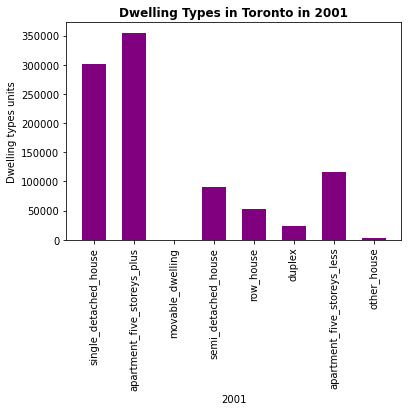

In [175]:
create_bar_2001= create_bar_chart(df_2001, "Dwelling Types in Toronto in 2001", "2001", "Dwelling types units", "purple")
create_bar_2001

In [53]:
# Bar chart for 2006

In [62]:
df_2006 = pd.DataFrame(dwelling_types_per_year.iloc[1,:])
df_2006.rename(columns= {2006: "dwelling"}, inplace= True)   

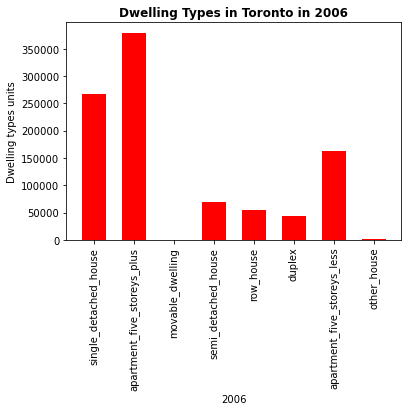

In [176]:
create_bar_2006 = create_bar_chart(df_2006, "Dwelling Types in Toronto in 2006", "2006", "Dwelling types units", "red")
create_bar_2006

In [64]:
df_2011 = pd.DataFrame(dwelling_types_per_year.iloc[2,:])
df_2011.rename(columns= {2011: "dwelling"}, inplace= True)                        

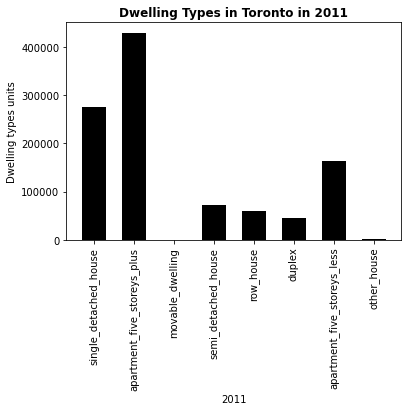

In [178]:
# Bar chart for 2011
create_bar_2011= create_bar_chart(df_2011, "Dwelling Types in Toronto in 2011", "2011", "Dwelling types units", "black")
create_bar_2011

In [66]:
# Bar chart for 2016
df_2016 = pd.DataFrame(dwelling_types_per_year.iloc[3,:])
df_2016.rename(columns= {2016: "dwelling"}, inplace= True)

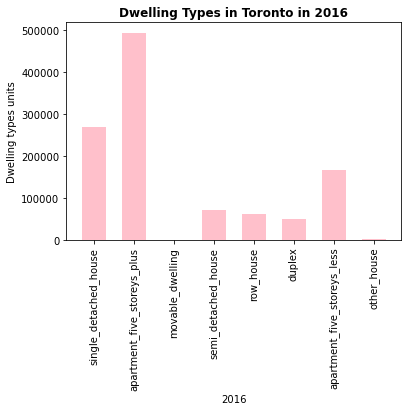

In [179]:
create_bar_2016 = create_bar_chart(df_2016, "Dwelling Types in Toronto in 2016", "2016", "Dwelling types units", "pink")
create_bar_2016

In [70]:
# Calculate the average monthly shelter costs for owned and rented dwellings

In [77]:
shelter_costs = to_data.groupby('year').sum()
shelter_costs = shelter_costs[['shelter_costs_owned', 'shelter_costs_rented']]
#There are a 140 neighborhoods
shelter_costs = shelter_costs / 140
shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [78]:
shelter_costs_owned = pd.DataFrame(shelter_costs.iloc[:,0])
shelter_costs_owned

,shelter_costs_owned
year,
2001,846.878571
2006,1316.800000
2011,1448.214286
2016,1761.314286


In [79]:
# Helper create_line_chart function

def line_chart(data, title, xlabel, ylabel, color):
    plt.plot(data, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold')

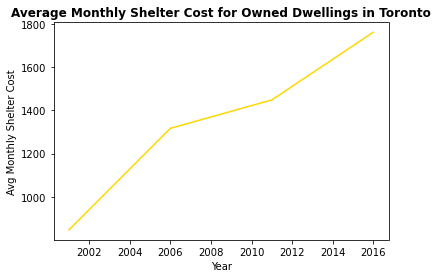

In [180]:
# Line chart for owned dwellings
average_monthly_owned = line_chart(shelter_costs_owned, 'Average Monthly Shelter Cost for Owned Dwellings in Toronto', 'Year', 'Avg Monthly Shelter Cost', 'gold')
average_monthly_owned

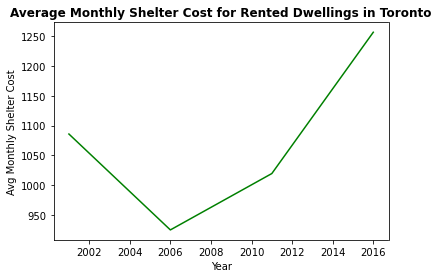

In [181]:
# Line chart for rented dwellings
shelter_costs_rented = pd.DataFrame(shelter_costs.iloc[:,1])
average_monthly_rented = line_chart(shelter_costs_rented, 'Average Monthly Shelter Cost for Rented Dwellings in Toronto', 'Year', 'Avg Monthly Shelter Cost', 'green')
average_monthly_rented

In [89]:
# Calculate the average house value per year
average_house_value_per_year = to_data.groupby('year').sum()
average_house_value_per_year = average_house_value_per_year[['average_house_value']]
average_house_value_per_year = average_house_value_per_year/140
average_house_value_per_year

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


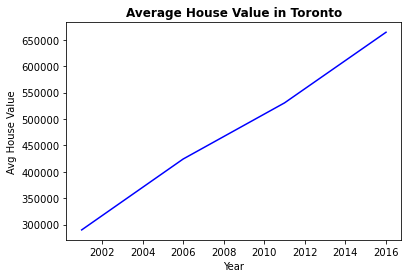

In [182]:
average_house_value_toronto = line_chart(average_house_value_per_year, 'Average House Value in Toronto', 'Year', 'Avg House Value', 'blue')
average_house_value_toronto

In [159]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_value = to_data[['neighbourhood', 'average_house_value']]
average_house_value

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864
...,...,...
2016,Wychwood,787760
2016,Yonge-Eglinton,1127052
2016,Yonge-St.Clair,1131888


In [183]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
linechart_for_average_house_value = average_house_value.hvplot(groupby = 'neighbourhood', xlabel = 'Year', ylabel= 'Average House Value').opts(yformatter= '%.0f')
linechart_for_average_house_value

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [ ]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE! 

In [165]:
to_data

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


In [170]:
number_of_dwelling_types_per_year =  to_data[['neighbourhood', 'single_detached_house' , 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]

In [171]:
number_of_dwelling_types_per_year

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0


In [184]:
barchart_number_of_dwelling_types_per_year = number_of_dwelling_types_per_year.hvplot.bar(groupby = 'neighbourhood', rot = 90, width= 650, height= 500, xlabel= "Year", ylabel = "Dwelling Type Units")
barchart_number_of_dwelling_types_per_year

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [188]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
neighbourhoods = to_data.groupby('neighbourhood').sum()
neighbourhoods = neighbourhoods / 4
neighbourhoods

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


In [189]:
top_10_expensivest = neighbourhoods.nlargest(10, 'average_house_value')
top_10_expensivest

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [197]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensivest_avg_house_value = top_10_expensivest[['average_house_value']]

In [202]:
top_10 = top_10_expensivest_avg_house_value.hvplot.bar(rot = 90, width= 500, height= 500, title = 'Top 10 Expensivest Neighbourhoods in Toronto', xlabel= "Neighbourhoods", ylabel = "Avg House Value").opts(yformatter= '%.0f')
top_10

:Bars   [neighbourhood]   (average_house_value)

In [214]:
#Neighbourhood Map
# Load neighbourhoods coordinates data
file_path = Path("../Py Viz/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations = df_neighbourhood_locations.set_index('neighbourhood')
df_neighbourhood_locations

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718
...,...,...
Wychwood,43.676919,-79.425515
Yonge-Eglinton,43.704689,-79.403590
Yonge-St.Clair,43.687859,-79.397871


In [215]:
# Calculate the mean values for each neighborhood
neighbourhoods.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [216]:
# Join the average values with the neighbourhood locations
neighbourhoods_map = pd.concat([df_neighbourhood_locations, neighbourhoods], axis = 'columns', join = 'inner')
neighbourhoods_map

,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,,,
Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,43.676919,-79.425515,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,43.704689,-79.403590,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,43.687859,-79.397871,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


In [222]:
neighbourhoods_map_no_index = neighbourhoods_map.reset_index()
neighbourhoods_map_no_index

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,43.676919,-79.425515,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,43.704689,-79.403590,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,43.687859,-79.397871,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,43.765736,-79.488883,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


In [229]:
load_dotenv()
map_box_api = os.getenv("MAP_BOX_KEY")
print(map_box_api)
px.set_mapbox_access_token(map_box_api)

pk.eyJ1IjoiZmVybjExMjMiLCJhIjoiY2wxYmNhZDl0MmVvcjNldjAzcTBqNDNnMyJ9.R37GH0MmgML-edU_T4sDaQ


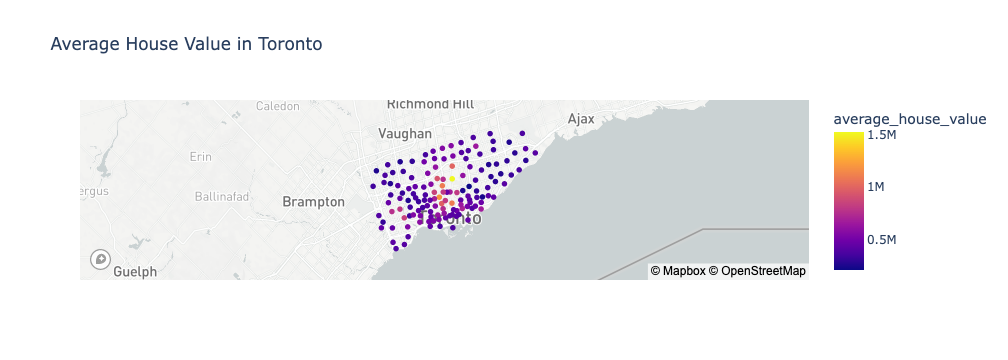

In [237]:
# Create a scatter mapbox to analyze neighbourhood info
map_1 = px.scatter_mapbox(
    neighbourhoods_map_no_index,
    title = 'Average House Value in Toronto',
    lat="lat",
    lon="lon",
    color = "average_house_value",
)
map_1